In [15]:
import matplotlib.pyplot as plt
import scipy.integrate
import torch
import sys  
sys.path.insert(0, '..')

from hnn.simulation import get_dataset, get_field, get_trajectory, get_vector_field, integrate_model
from hnn.train import train

In [16]:
import argparse

def get_args():
    parser = argparse.ArgumentParser(description=None)
    parser.add_argument('--input_dim', default=2, type=int, help='dimensionality of input tensor')
    parser.add_argument('--hidden_dim', default=200, type=int, help='hidden dimension of mlp')
    parser.add_argument('--learn_rate', default=1e-3, type=float, help='learning rate')
    parser.add_argument('--total_steps', default=500, type=int, help='number of gradient steps')
    parser.add_argument('--name', default='pend', type=str, help='only one option right now')
    parser.add_argument('--field_type', default='solenoidal', type=str, help='type of vector field to learn')
    parser.set_defaults(feature=True)
    return parser.parse_args()

In [17]:
args = get_args()
model, stats = train(args)

Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])
Spring IVP (2, 90) ODEINT IVP torch.Size([90, 2])


In [18]:
R = 2.5
t_span=[0.0, 28.0]
LINE_SEGMENTS = 10
ARROW_SCALE = 40
ARROW_WIDTH = 6e-3
LINE_WIDTH = 2

field_args = {
    'xmin': -R,
    'xmax': R,
    'ymin': -R,
    'ymax': R,
    'gridsize': 10,
}

In [19]:

# integrate along those fields starting from point (1,0)
ivp = integrate_model(
        model,
        t_span,
        y0=torch.tensor([2.1, 0.0]),
        timescale=100
        # rtol=1e-12
)

field = get_field(**field_args)
vector_field = get_vector_field(model, **field_args)


Spring IVP (2, 120) ODEINT IVP torch.Size([120, 2])
tensor([2.1000, 2.1197, 2.1401, 2.1611, 2.1827, 2.2048, 2.2273, 2.2501, 2.2730,
        2.2958, 2.3186, 2.3410, 2.3630, 2.3846, 2.4058, 2.4265, 2.4467, 2.4665,
        2.4860, 2.5050, 2.5238, 2.5423, 2.5605, 2.5786, 2.5965, 2.6142, 2.6319,
        2.6495, 2.6671, 2.6846, 2.7022]) tensor([ 0.0000, -0.0030, -0.0061, -0.0092, -0.0124, -0.0156, -0.0190, -0.0224,
        -0.0258, -0.0294, -0.0330, -0.0367, -0.0405, -0.0443, -0.0483, -0.0523,
        -0.0564, -0.0605, -0.0648, -0.0691, -0.0735, -0.0780, -0.0826, -0.0872,
        -0.0920, -0.0969, -0.1018, -0.1069, -0.1121, -0.1174, -0.1229])
tensor([2.7198, 2.7374, 2.7551, 2.7729, 2.7909, 2.8089, 2.8271, 2.8455, 2.8641,
        2.8829, 2.9019, 2.9211, 2.9406, 2.9603, 2.9802, 3.0004, 3.0209, 3.0415,
        3.0623, 3.0832, 3.1043, 3.1254, 3.1465, 3.1676, 3.1885, 3.2092, 3.2297,
        3.2499, 3.2699, 3.2894, 3.3087]) tensor([-0.1285, -0.1343, -0.1403, -0.1465, -0.1529, -0.1596, -0.1665, -0.

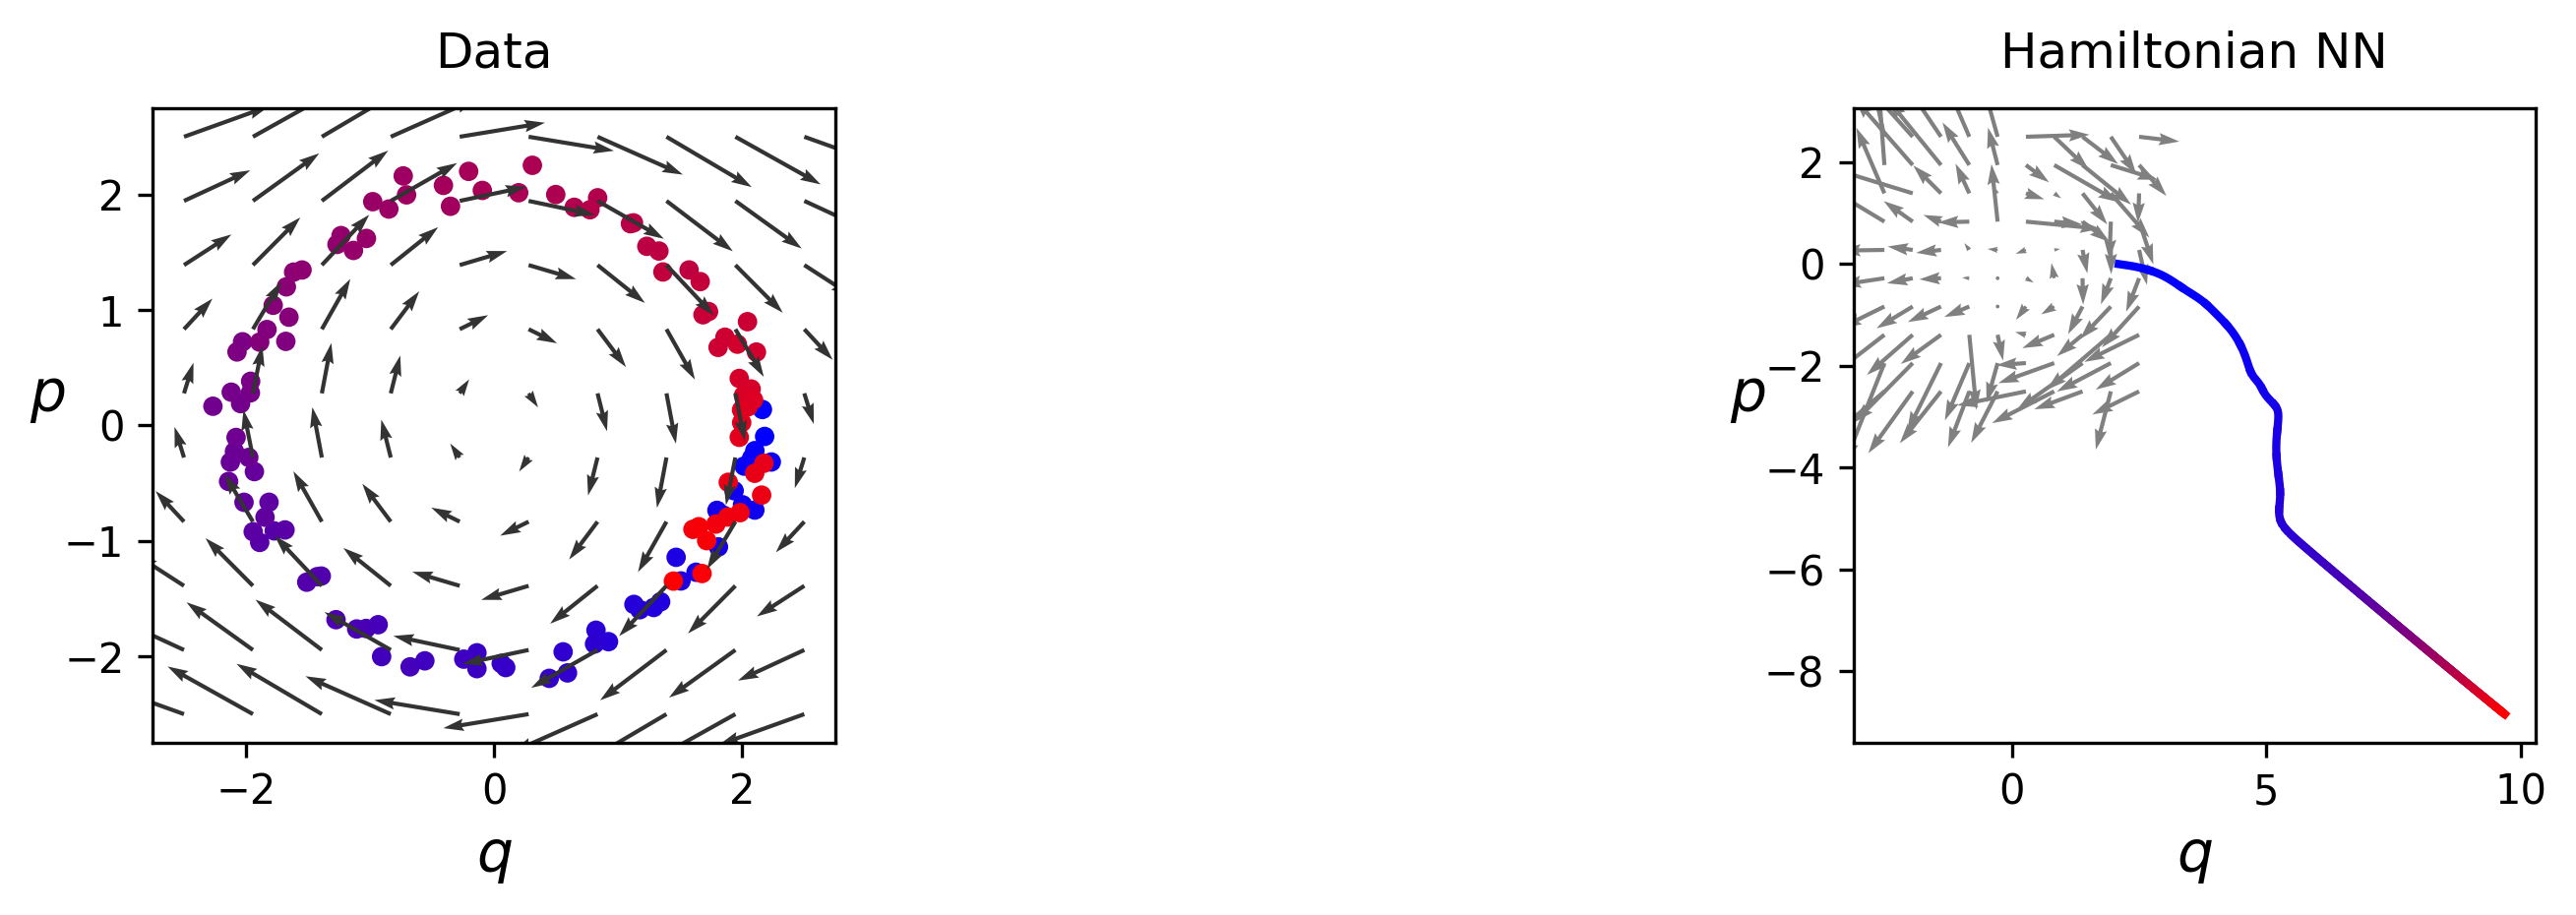

In [20]:
fig = plt.figure(figsize=(11.3, 3.2), facecolor='white', dpi=300)

# plot data
fig.add_subplot(1, 4, 2, frameon=True)
x, y, dx, dy, t = get_trajectory(t_span=[0, 4], radius=2.1, y0=torch.tensor([2.1, 0]))
N = len(x)
point_colors = [(i/N, 0, 1-i/N) for i in range(N)]
plt.scatter(x, y, s=14, label='data', c=point_colors)
plt.quiver(
        field['x'][:,0],
        field['x'][:,1],
        field['dx'][:,0],
        field['dx'][:,1],
        cmap='gray_r',
        scale=ARROW_SCALE,
        width=ARROW_WIDTH,
        color=(.2,.2,.2)
)  
plt.xlabel("$q$", fontsize=14)
plt.ylabel("$p$", rotation=0, fontsize=14)
plt.title("Data", pad=10)

# plot HNN
fig.add_subplot(1, 4, 4, frameon=True)
plt.quiver(
        field['x'][:,0],
        field['x'][:,1],
        vector_field[:,0],
        vector_field[:,1],
        cmap='gray_r',
        scale=ARROW_SCALE,
        width=ARROW_WIDTH,
        color=(.5,.5,.5)
)

# print(
#     "SPR viz", [v.shape for v in torch.tensor_split(ivp, LINE_SEGMENTS)]
# )

lines = round(ivp.shape[0] / 30)

for i, l in enumerate(torch.tensor_split(ivp, lines)):
        color = (float(i)/lines, 0, 1-float(i)/lines)
        print(l[:, 0], l[:, 1])
        plt.plot(l[:, 0], l[:, 1], color=color, linewidth=LINE_WIDTH)

plt.xlabel("$q$", fontsize=14)
plt.ylabel("$p$", rotation=0, fontsize=14)
# plt.xlim(-R, R)
# plt.ylim(-R, R)
plt.title("Hamiltonian NN", pad=10)
plt.tight_layout() ; plt.show()